# Projekt 1 Biometria

### Wczytanie obrazu i wyświetlanie

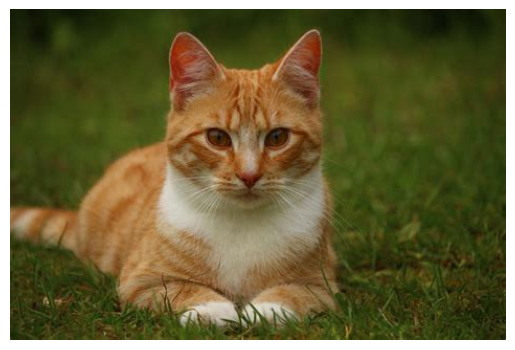

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def read_image(file):
    image = Image.open(file)
    # Konwersja obrazu na macierz pikseli
    pixel_matrix = np.array(image)
    n = len(pixel_matrix)
    m = len(pixel_matrix[0])
    return pixel_matrix, n, m

# # Wczytanie obrazu
# image = Image.open('cat2.png')

# # Konwersja obrazu na macierz pikseli
# pixel_matrix = np.array(image)
# n = len(pixel_matrix)
# m = len(pixel_matrix[0])

# # print(pixel_matrix)
# # print(len(pixel_matrix))
# # print(len(pixel_matrix[0]))

def show_image(pixel_matrix):
    # Wyświetlenie obrazu
    plt.imshow(pixel_matrix)
    plt.axis('off')  # Wyłączenie osi
    plt.show()

def save_image(pixel_matrix, output_file):
    pixel_matrix = pixel_matrix.astype(np.uint8)
    # Konwersja macierzy pikseli z powrotem na obraz
    image = Image.fromarray(pixel_matrix)
    # Zapisanie obrazu do pliku .bmp
    image.save(output_file, format='BMP')

pixel_matrix, n, m = read_image('cat2.bmp')


show_image(pixel_matrix)

# # Wczytanie obrazu
# image2 = Image.open('cat2.bmp')

# # Konwersja obrazu na macierz pikseli
# pixel_matrix2 = np.array(image2)

# # Wyświetlenie obrazu
# plt.imshow(pixel_matrix2)
# plt.axis('off')  # Wyłączenie osi
# plt.show()

def show_image_ax(pixel_matrix, ax):
    # Wyświetlenie obrazu
    ax.imshow(pixel_matrix)
    ax.axis('off')  # Wyłączenie osi


## Operacje na pikselach

In [2]:
def in_range(x):
    x = max(0, x)
    x = min(x, 255)
    return x

1. Konwersja do odcieni szarości

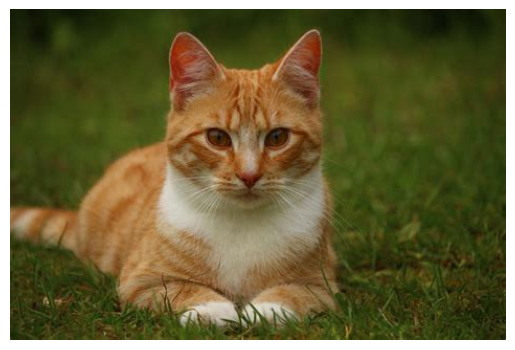

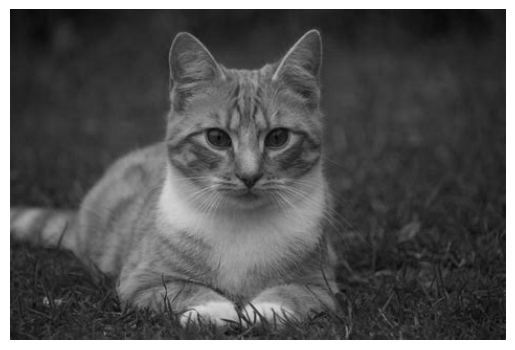

In [3]:
def change_grey(pixel_matrix):
    grey_pixel_matrix = np.zeros((n, m, 3), dtype=int)
    for i in range(n):
        for j in range(m):
            # r, g, b = pixel_matrix[i,j]
            s = np.mean(pixel_matrix[i,j])
            grey_pixel_matrix[i,j] = [s,s,s]
    return grey_pixel_matrix

grey_pixel_matrix = change_grey(pixel_matrix)

show_image(pixel_matrix)
show_image(grey_pixel_matrix)

2. Korekta jasności

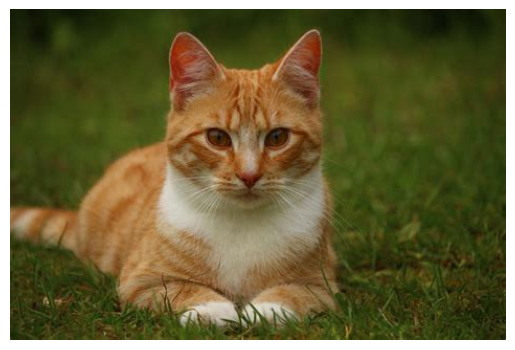

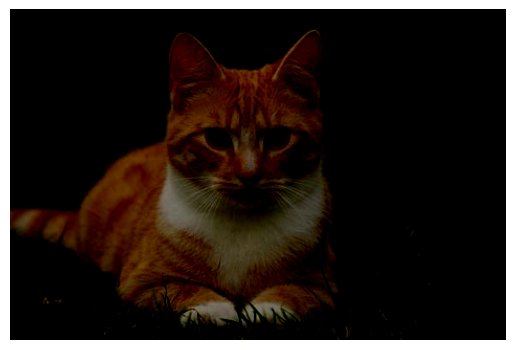

In [4]:
# def add_in_range(x, add):
#     x += add
#     x = max(0,x)
#     x=min(x, 255)
#     return x

def brigthness_change(pixel_matrix, level):
    brightness_pixel_matrix = np.zeros((n, m, 3), dtype=int)
    for i in range(n):
        for j in range(m):
            r, g, b = pixel_matrix[i,j]
            r += level
            g += level
            b += level
            r = in_range(r)
            g = in_range(g)
            b = in_range(b)

            brightness_pixel_matrix[i,j] = [r,g,b]
    return brightness_pixel_matrix

brightness_pixel_matrix = brigthness_change(pixel_matrix, -100)

show_image(pixel_matrix)
show_image(brightness_pixel_matrix)

3. Korekta kontrastu

In [5]:
# import copy

# def modify_in_range(x, mean, factor):
#     x = factor*(x-mean) + mean
#     x = max(0,x)
#     x = min(x, 255)
#     return x

# def contrast_change(pixel_matrix, factor):
#     # contrast_pixel_matrix = np.zeros((n, m, 3), dtype=int)
#     contrast_pixel_matrix = copy.deepcopy(pixel_matrix)
#     # contrast_pixel_matrix = contrast_pixel_matrix/255
#     mean = np.mean(contrast_pixel_matrix)
#     for i in range(n):
#         for j in range(m):
#             r, g, b = pixel_matrix[i,j]

#             r = modify_in_range(r,mean, factor)
#             g = modify_in_range(g,mean, factor)
#             b = modify_in_range(b,mean, factor)

#             contrast_pixel_matrix[i,j] = [r,g,b]
#     return contrast_pixel_matrix

# contrast_pixel_matrix = contrast_change(pixel_matrix, 50)

# show_image(pixel_matrix)
# show_image(contrast_pixel_matrix)

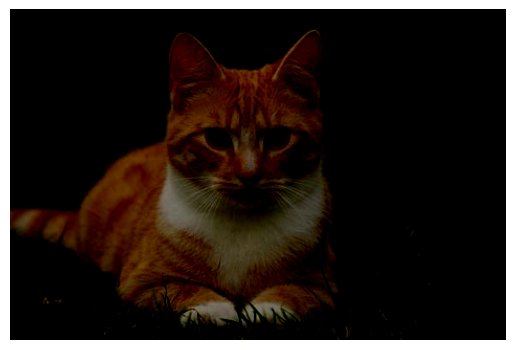

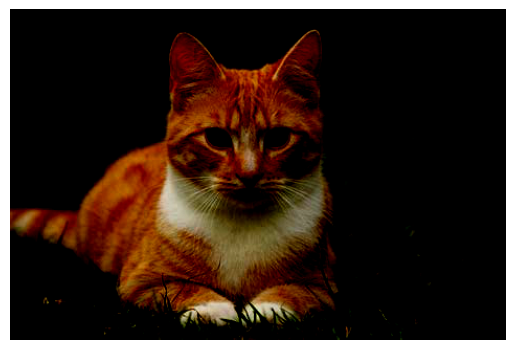

In [27]:
import copy

def add_n_mult_in_range(x, mean, factor):
    x = factor*(x + mean)*255
    # # print(x)
    # x = max(0, x)
    # x = min(x, 255)
    r = in_range(x)
    return x

def contrast_change(pixel_matrix):
    # contrast_pixel_matrix = np.zeros((n, m, 3), dtype=int)
    contrast_pixel_matrix = copy.deepcopy(pixel_matrix)
    # contrast_pixel_matrix = contrast_pixel_matrix/255
    minI = np.min(pixel_matrix)
    maxI = np.max(pixel_matrix)
    # mean = np.mean(contrast_pixel_matrix)
    for i in range(n):
        for j in range(m):
            r, g, b = pixel_matrix[i,j]
            r = add_n_mult_in_range(r,-minI, 1/(maxI - minI))
            g = add_n_mult_in_range(g,-minI, 1/(maxI - minI))
            b = add_n_mult_in_range(b,-minI, 1/(maxI - minI))

            contrast_pixel_matrix[i,j] = [r,g,b]
    return contrast_pixel_matrix

contrast_pixel_matrix = contrast_change(brightness_pixel_matrix)

show_image(brightness_pixel_matrix)
show_image(contrast_pixel_matrix)

4. Negatyw

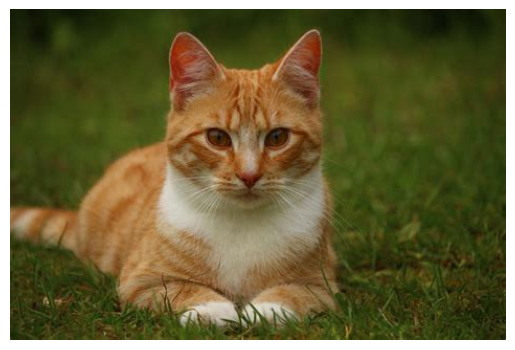

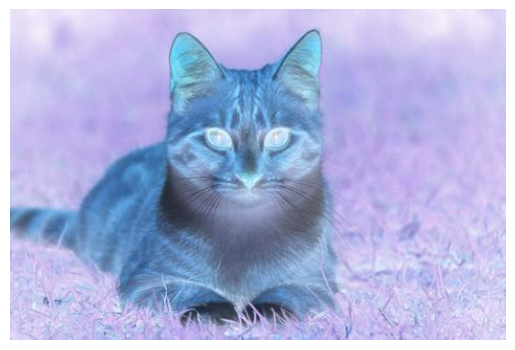

In [7]:
import copy

def negate_in_range(x):
    x = 255 - x
    # print(x)
    # x = max(0, x)
    # x = min(x, 255)
    in_range(x)
    return x

def negative(pixel_matrix):
    # contrast_pixel_matrix = np.zeros((n, m, 3), dtype=int)
    negative_pixel_matrix = np.zeros((n, m, 3), dtype=int)
    # contrast_pixel_matrix = contrast_pixel_matrix/255
    minI = np.min(pixel_matrix)
    maxI = np.max(pixel_matrix)
    # mean = np.mean(contrast_pixel_matrix)
    for i in range(n):
        for j in range(m):
            r, g, b = pixel_matrix[i,j]
            r = negate_in_range(r)
            g = negate_in_range(g)
            b = negate_in_range(b)

            negative_pixel_matrix[i,j] = [r,g,b]
    return negative_pixel_matrix

negative_pixel_matrix = negative(pixel_matrix)

show_image(pixel_matrix)
show_image(negative_pixel_matrix)
# save_image(negative_pixel_matrix, 'cat_negative.bmp')

5. Binaryzacja

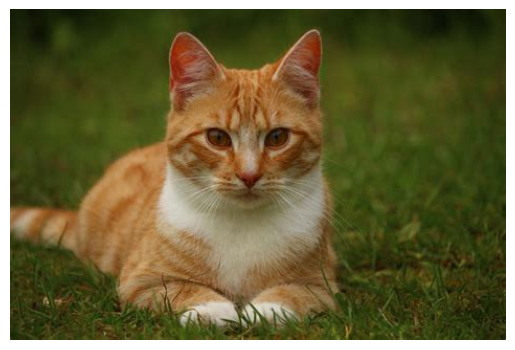

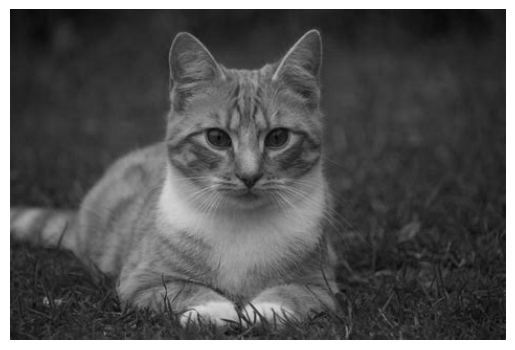

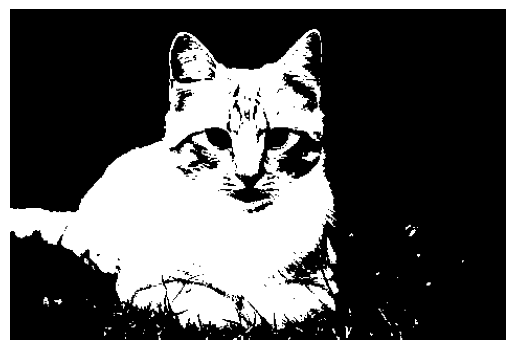

In [8]:
def b_in_range(x):
    x = 255 - x
    # print(x)
    # x = max(0, x)
    # x = min(x, 255)
    in_range(x)
    return x

def binary(pixel_matrix, cut_off):
    grey_pixel_matrix = change_grey(pixel_matrix)

    # contrast_pixel_matrix = np.zeros((n, m, 3), dtype=int)
    binary_pixel_matrix = np.zeros((n, m, 3), dtype=int)
    # contrast_pixel_matrix = contrast_pixel_matrix/255
    # minI = np.min(pixel_matrix)
    # maxI = np.max(pixel_matrix)
    # # mean = np.mean(contrast_pixel_matrix)
    for i in range(n):
        for j in range(m):
            s = grey_pixel_matrix[i,j,0]
            # print(s)
            if s >= cut_off:
                s=255
            else:
                s=0
            # print(s)
            binary_pixel_matrix[i,j] = [s,s,s]
    return binary_pixel_matrix

binary_pixel_matrix = binary(pixel_matrix,80)

show_image(pixel_matrix)
show_image(grey_pixel_matrix)

show_image(binary_pixel_matrix)

## Filtry graficzne

In [9]:
def cal_weights(pixel_matrix, size, weights, i, j, mean):
    r_sum = 0
    g_sum = 0
    b_sum = 0
    for k in range(-size, size + 1):
        for l in range(-size, size+1):
            r_sum += pixel_matrix[i-k, j-l,0]*weights[k+size][l+size]
            g_sum += pixel_matrix[i-k, j-l,1]*weights[k+size][l+size]
            b_sum += pixel_matrix[i-k, j-l,2]*weights[k+size][l+size]
            
    if mean == 1:
        r_sum = r_sum / (2*size + 1)**2
        g_sum = g_sum / (2*size + 1)**2
        b_sum = b_sum / (2*size + 1)**2
    r_sum = in_range(r_sum)
    g_sum = in_range(g_sum)
    b_sum = in_range(b_sum)
    pixel = [r_sum, g_sum, b_sum]
    return pixel



def use_filter(pixel_matrix, size, weights, mean=1):
    filter_pixel_matrix = np.zeros((n, m, 3), dtype=int)
    for i in range(size, n-size):
        for j in range(size, m-size):
            pixel = cal_weights(pixel_matrix, size, weights, i, j, mean)
            filter_pixel_matrix[i,j] = pixel
    return filter_pixel_matrix

1. Filtr uśredniający

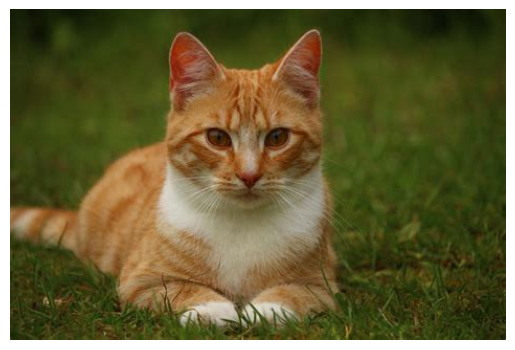

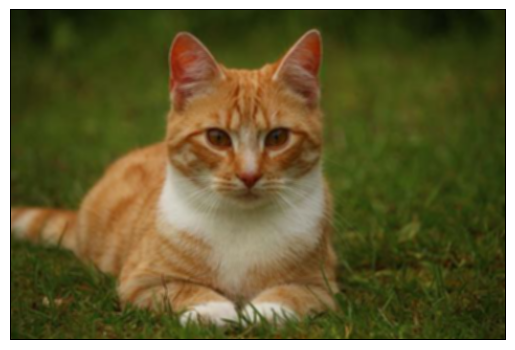

In [10]:
average_pixel_matrix1 = use_filter(pixel_matrix,1, [[1,1,1],[1,1,1],[1,1,1]])
# average_pixel_matrix2 = average(pixel_matrix,2, [[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],])


show_image(pixel_matrix)

show_image(average_pixel_matrix1)
# show_image(average_pixel_matrix2)

In [11]:
# def average(pixel_matrix, size):
#     average_pixel_matrix = np.zeros((n, m, 3), dtype=int)
#     for i in range(size, n-size):
#         for j in range(size, m-size):
#             r_mean = 0
#             g_mean = 0
#             b_mean = 0
#             for k in range(-size, size + 1):
#                 for l in range(-size, size+1):
#                     r_mean += pixel_matrix[i-k, j-l,0]
#                     g_mean += pixel_matrix[i-k, j-l,1]
#                     b_mean += pixel_matrix[i-k, j-l,2]
#             r_mean /= (2*size + 1)**2
#             g_mean /= (2*size + 1)**2
#             b_mean /= (2*size + 1)**2
#             # print(int(r_mean))
#             average_pixel_matrix[i,j] = [int(r_mean), int(g_mean), int(b_mean)]
#     return average_pixel_matrix


# average_pixel_matrix = average(pixel_matrix,2)

# show_image(pixel_matrix)

# show_image(average_pixel_matrix)

In [12]:
# def cal_weights(pixel_matrix, size, weights, i, j):
#     r_sum = 0
#     g_sum = 0
#     b_sum = 0
#     for k in range(-size, size + 1):
#         for l in range(-size, size+1):
#             r_sum += pixel_matrix[i-k, j-l,0]*weights[k+size][l+size]
#             g_sum += pixel_matrix[i-k, j-l,1]*weights[k+size][l+size]
#             b_sum += pixel_matrix[i-k, j-l,2]*weights[k+size][l+size]
#     r_mean = r_sum / (2*size + 1)**2
#     g_mean = g_sum / (2*size + 1)**2
#     b_mean = b_sum / (2*size + 1)**2
#     pixel = [r_mean, g_mean, b_mean]
#     return pixel



# def average(pixel_matrix, size, weights):
#     average_pixel_matrix = np.zeros((n, m, 3), dtype=int)
#     for i in range(size, n-size):
#         for j in range(size, m-size):
#             pixel = cal_weights(pixel_matrix, size, weights, i, j)
#             # r_mean = 0
#             # g_mean = 0
#             # b_mean = 0
#             # for k in range(-size, size + 1):
#             #     for l in range(-size, size+1):
#             #         r_mean += pixel_matrix[i-k, j-l,0]
#             #         g_mean += pixel_matrix[i-k, j-l,1]
#             #         b_mean += pixel_matrix[i-k, j-l,2]
#             # r_mean /= (2*size + 1)**2
#             # g_mean /= (2*size + 1)**2
#             # b_mean /= (2*size + 1)**2
#             # # print(int(r_mean))
#             average_pixel_matrix[i,j] = pixel
#     return average_pixel_matrix


# average_pixel_matrix1 = average(pixel_matrix,1, [[1,1,1],[1,1,1],[1,1,1]])
# # average_pixel_matrix2 = average(pixel_matrix,2, [[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],])


# show_image(pixel_matrix)

# show_image(average_pixel_matrix)
# # show_image(average_pixel_matrix2)

2. Filtr Gaussa

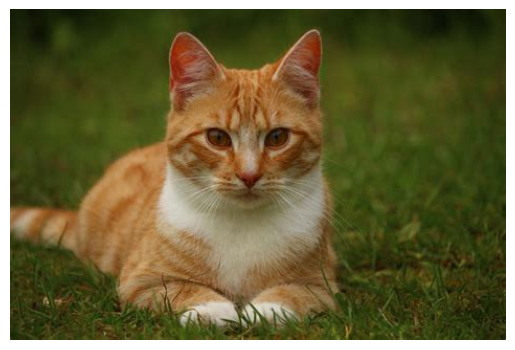

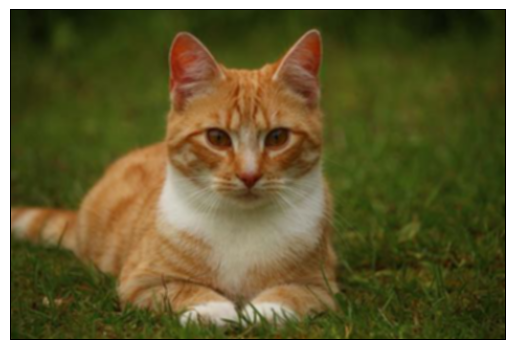

In [13]:
gauss_pixel_matrix = use_filter(pixel_matrix,1, [[0.0947416,0.118318,0.0947416],
                                                 [0.118318,0.147761,0.118318],
                                                 [0.0947416,0.118318,0.0947416]], 0)
# average_pixel_matrix2 = average(pixel_matrix,2, [[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],])


show_image(pixel_matrix)

show_image(gauss_pixel_matrix)
# show_image(average_pixel_matrix2)

3. Filtr wyostrzający

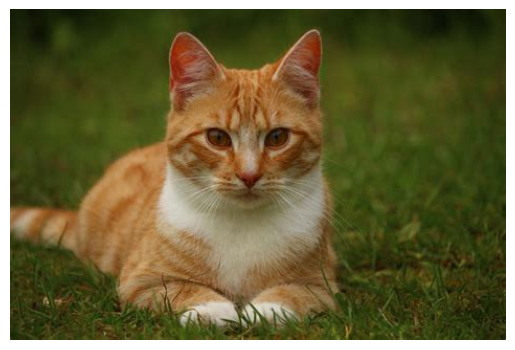

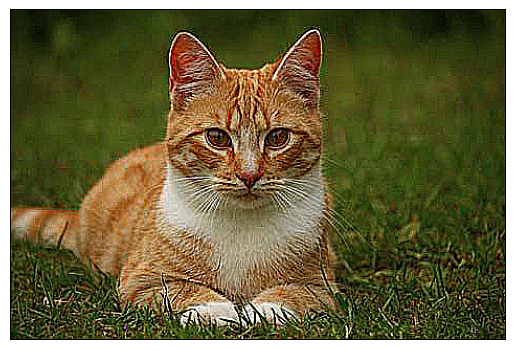

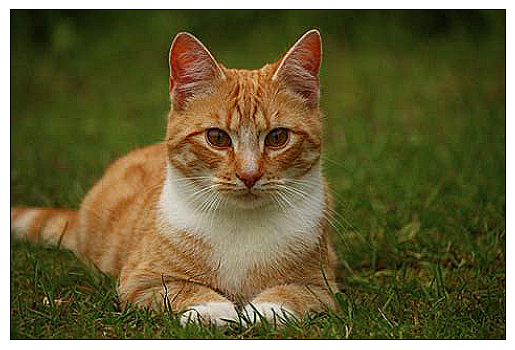

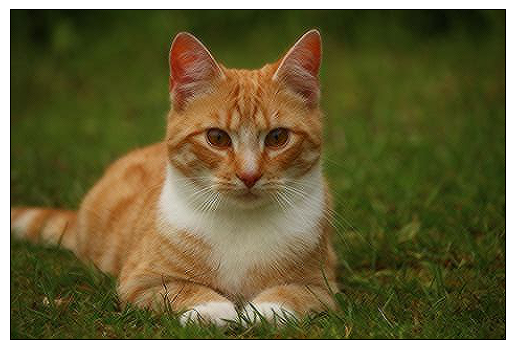

In [14]:
sharpen_pixel_matrix = use_filter(pixel_matrix,1, [[-1, -1, -1],
                                                   [-1, 9,	-1],
                                                   [-1, -1, -1]], 0)
# average_pixel_matrix2 = average(pixel_matrix,2, [[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],])
sharpen_pixel_matrix2 = use_filter(pixel_matrix,1, [[0, -1, 0],
                                                   [-1, 5,	-1],
                                                   [0, -1, 0]], 0)

sharpen_pixel_matrix3= use_filter(pixel_matrix,1, [[1, -2, 1],
                                                   [-2, 5,	-2],
                                                   [1, -2, 1]], 0)

# sharpen_pixel_matrix4= use_filter(pixel_matrix,1, [[0, -1, 0],
#                                                    [-1, 20,	-1],
#                                                    [0, -1, 0]], 1)

show_image(pixel_matrix)

show_image(sharpen_pixel_matrix)

show_image(sharpen_pixel_matrix2)

show_image(sharpen_pixel_matrix3)

# show_image(sharpen_pixel_matrix4)


# show_image(average_pixel_matrix2)

In [15]:
# sharpen_pixel_matrix = use_filter(pixel_matrix,1, [[0, -1, 0],
#                                                    [-1, 5,	-1],
#                                                    [0, -1, 0]], 0)
# # average_pixel_matrix2 = average(pixel_matrix,2, [[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],])


# show_image(pixel_matrix)

# show_image(sharpen_pixel_matrix)
# # show_image(average_pixel_matrix2)

### Histogram

1. koloru

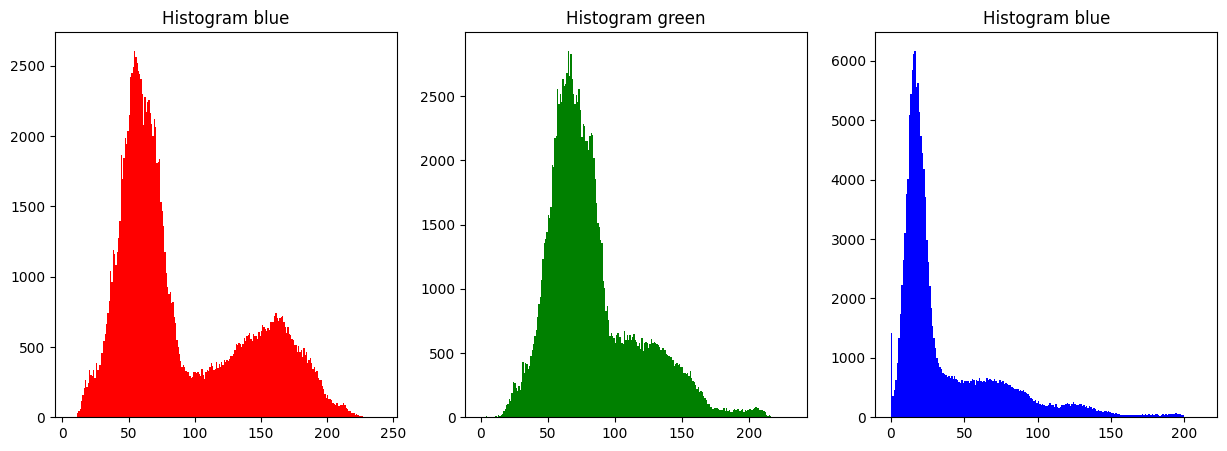

In [16]:
import matplotlib.pyplot as plt

def col_list(pixel_matrix, col):
    col_matrix = pixel_matrix[:,:,col]
    col_list = col_matrix.flatten()
    # print(min(col_list), max(col_list))
    # plot = plt.hist(col_list, color = 'blue', bins = max(col_list)-min(col_list))
    return col_list

# list_red = col_list(pixel_matrix, 0)
# list_green = col_list(pixel_matrix, 1)
# list_blue = col_list(pixel_matrix, 2)


def col_hist(pixel_matrix):
    list_red = col_list(pixel_matrix, 0)
    list_green = col_list(pixel_matrix, 1)
    list_blue = col_list(pixel_matrix, 2)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)  # 1 wiersz, 3 kolumny, pierwszy wykres
    plt.hist(list_red, color='red', bins = max(list_red)-min(list_red))
    plt.title('Histogram blue')

    plt.subplot(1, 3, 2)  # 1 wiersz, 3 kolumny, pierwszy wykres
    plt.hist(list_green, color='green', bins = max(list_green)-min(list_green))
    plt.title('Histogram green')

    plt.subplot(1, 3, 3)  # 1 wiersz, 3 kolumny, pierwszy wykres
    plt.hist(list_blue, color='blue', bins = max(list_blue)-min(list_blue))
    plt.title('Histogram blue')

col_hist(pixel_matrix)


2. jasności

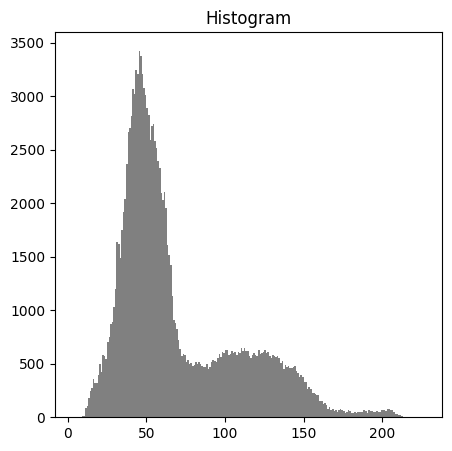

In [17]:
import matplotlib.pyplot as plt

def col_list(pixel_matrix, col):
    col_matrix = pixel_matrix[:,:,col]
    col_list = col_matrix.flatten()
    # print(min(col_list), max(col_list))
    # plot = plt.hist(col_list, color = 'blue', bins = max(col_list)-min(col_list))
    return col_list

# list_red = col_list(pixel_matrix, 0)
# list_green = col_list(pixel_matrix, 1)
# list_blue = col_list(pixel_matrix, 2)


def image_hist(pixel_matrix):
    grey_pixel_matrix = change_grey(pixel_matrix)
    list_grey = col_list(grey_pixel_matrix, 0)

    plt.figure(figsize=(5, 5))

    plt.hist(list_grey, color='grey', bins = max(list_grey)-min(list_grey))
    plt.title('Histogram')


image_hist(pixel_matrix)


### Projekcja

1. Pionowa

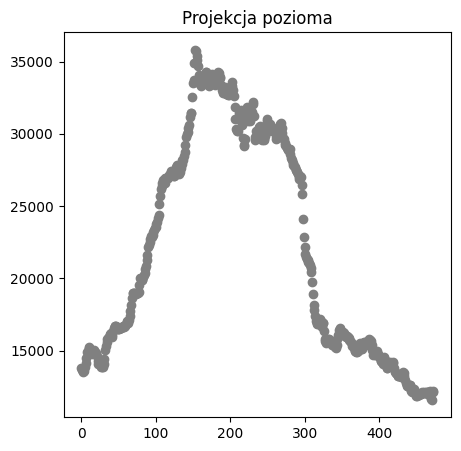

In [18]:
def projection_horizontal(pixel_matrix, ax):
    # 0 - horizontal
    # 1 - vertical
    grey_pixel_matrix = change_grey(pixel_matrix)

    sums = np.zeros((m), dtype=int)
    for i in range(n):
        for j in range(m):
            sums[j] += grey_pixel_matrix[i,j,0]
    # print(max(sums), min(sums))

    # print(max(sums)-min(sums))
    # print(sums)
    # fig, ax = plt.subplots()

    # ax.figure(figsize=(5, 5))

    # plt.hist(sums, color='grey', bins = m)
    ax.scatter(range(m), sums, color='grey')

    ax.set_title('Projekcja pozioma')

    # plt.figure(figsize=(5, 5))

    # # plt.hist(sums, color='grey', bins = m)
    # plt.scatter(range(m), sums, color='grey')

    # plt.title('Projekcja pozioma')
    # return fig

fig, ax = plt.subplots(figsize=(5,5))
projection_horizontal(pixel_matrix, ax)
plt.show()

2. Projekcja pionowa

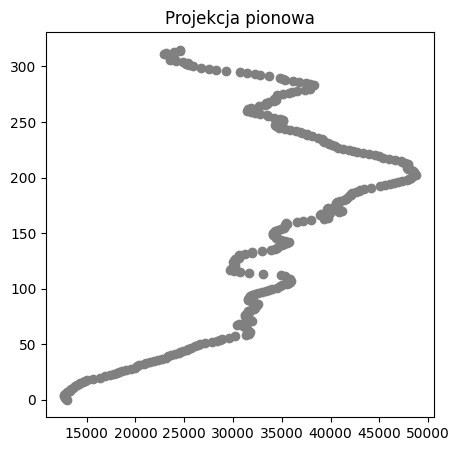

In [19]:
def projection_vertical(pixel_matrix, ax):
    # 0 - horizontal
    # 1 - vertical
    grey_pixel_matrix = change_grey(pixel_matrix)

    sums = np.zeros((n), dtype=int)
    for i in range(n):
        for j in range(m):
            sums[i] += grey_pixel_matrix[i,j,0]
    # print(max(sums), min(sums))

    # print(max(sums)-min(sums))
    # print(sums)
    # plt.figure(figsize=(5, 5))

    # plt.hist(sums, color='grey', bins = n)
    ax.scatter(sums, range(n), color='grey')

    ax.set_title('Projekcja pionowa')

fig, ax = plt.subplots(figsize=(5,5))
projection_vertical(pixel_matrix, ax)
plt.show()

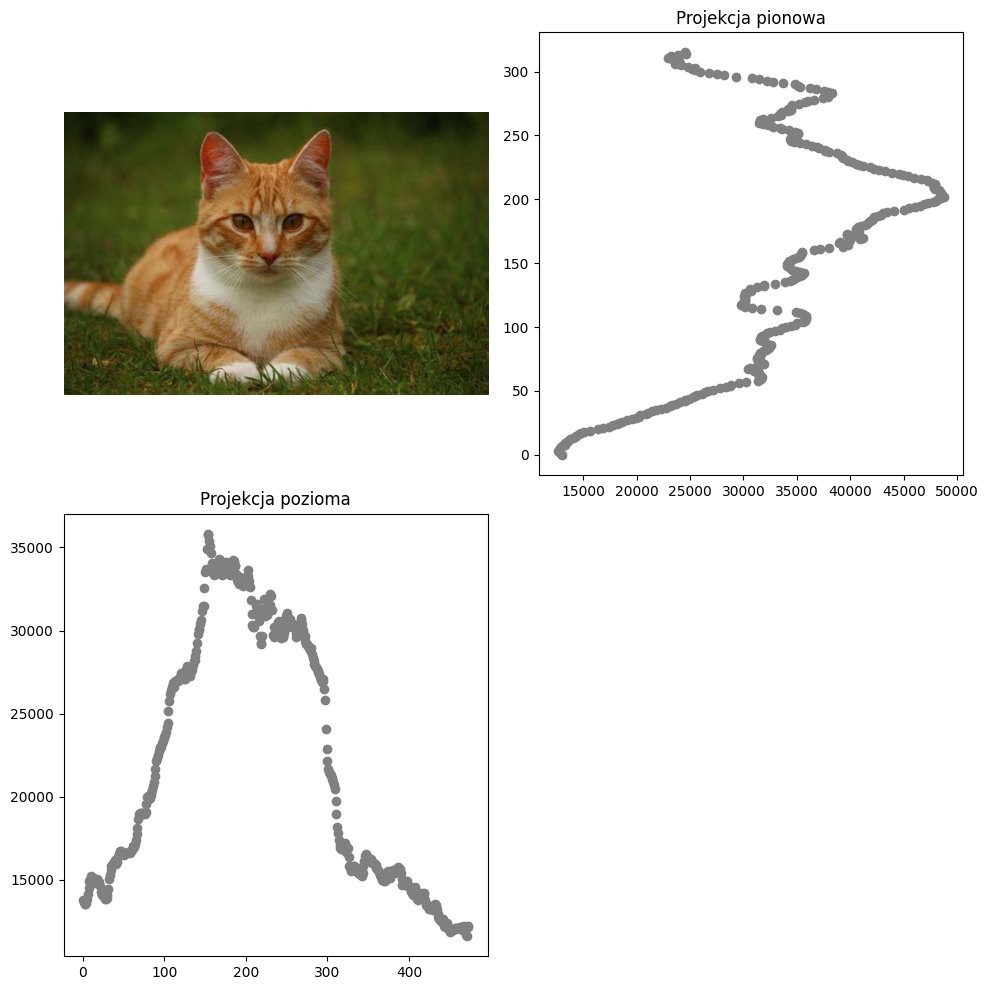

In [20]:
fig, axes = plt.subplots(2,2, figsize=(10, 10))


show_image_ax(pixel_matrix, axes[0,0])

# plt.subplot(1, 2, 2)  # 1 wiersz, 3 kolumny, pierwszy wykres
projection_vertical(pixel_matrix, axes[0, 1])

# plt.subplot(2, 1, 1)  # 1 wiersz, 3 kolumny, pierwszy wykres
projection_horizontal(pixel_matrix, axes[1, 0])

axes[1,1].axis('off')

# show_image_ax(pixel_matrix, axes[1,1])



plt.tight_layout()
plt.show()

### Wykrywanie krawędzi

1. krzyż Robertsa

In [21]:
def cal_weights(pixel_matrix, size, weights, i, j, mean):
    r_sum = 0
    g_sum = 0
    b_sum = 0
    for k in range(-size, size + 1):
        for l in range(-size, size+1):
            r_sum += pixel_matrix[i-k, j-l,0]*weights[k+size][l+size]
            g_sum += pixel_matrix[i-k, j-l,1]*weights[k+size][l+size]
            b_sum += pixel_matrix[i-k, j-l,2]*weights[k+size][l+size]
            
    if mean == 1:
        r_sum = r_sum / (2*size + 1)**2
        g_sum = g_sum / (2*size + 1)**2
        b_sum = b_sum / (2*size + 1)**2
    r_sum = in_range(r_sum)
    g_sum = in_range(g_sum)
    b_sum = in_range(b_sum)
    pixel = [r_sum, g_sum, b_sum]
    return pixel



def use_filter(pixel_matrix, size, weights, mean=1):
    filter_pixel_matrix = np.zeros((n, m, 3), dtype=int)
    for i in range(size, n-size):
        for j in range(size, m-size):
            pixel = cal_weights(pixel_matrix, size, weights, i, j, mean)
            filter_pixel_matrix[i,j] = pixel
    return filter_pixel_matrix

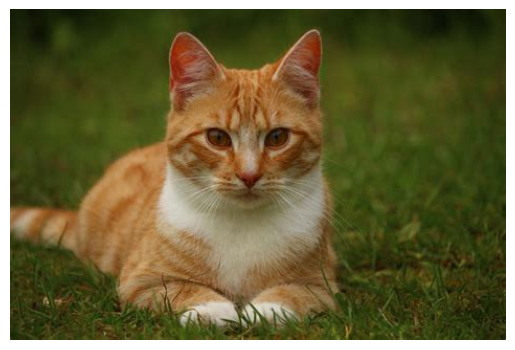

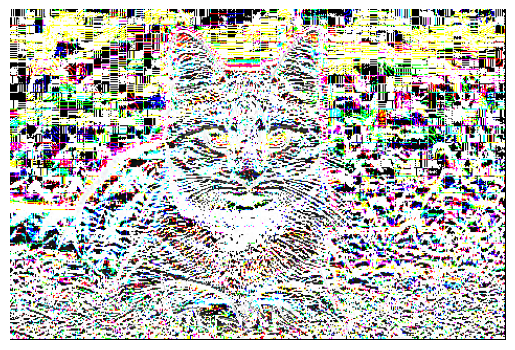

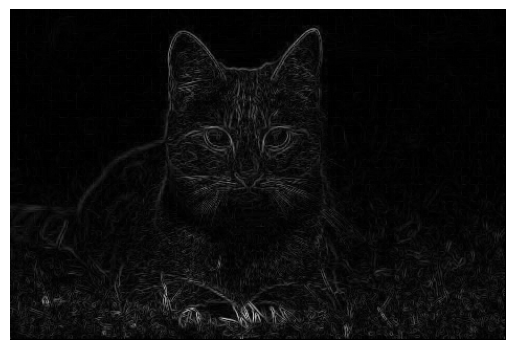

In [38]:
def cal_conv(pixel_matrix, i, j):

    r_temp_1, g_temp_1, b_temp_1 = (pixel_matrix[i, j] - pixel_matrix[i+1, j+1]).astype(np.int32)
    r_temp_2, g_temp_2, b_temp_2 = (pixel_matrix[i, j+1] - pixel_matrix[i+1, j]).astype(np.int32)
    # print(r_temp_1, r_temp_2,in_range(abs(r_temp_1) + abs(r_temp_2)))
    r = in_range(abs(r_temp_1) + abs(r_temp_2))
    g = in_range(abs(g_temp_1) + abs(g_temp_2))
    b = in_range(abs(b_temp_1) + abs(b_temp_2))
    pixel = [r, g, b]
    return pixel


def roberts_cross(pixel_matrix):
    rob_cross_pixel_matrix = np.zeros((n, m, 3), dtype=int)
    # weights_1 = [[1,0],[0,-1]]
    # weights_2 = [[0,1],[-1,0]]
    for i in range(n-1):
        for j in range(m-1):
            # r, b, g = pixel_matrix[i,j]
            # temp_1 = 
            pixel = cal_conv(pixel_matrix, i, j)
            rob_cross_pixel_matrix[i,j] = pixel
    return rob_cross_pixel_matrix

rob_cross_pixel_matrix = roberts_cross(pixel_matrix)

rob_cross_pixel_matrix_grey = roberts_cross(grey_pixel_matrix)

show_image(pixel_matrix)

show_image(rob_cross_pixel_matrix)

show_image(rob_cross_pixel_matrix_grey)

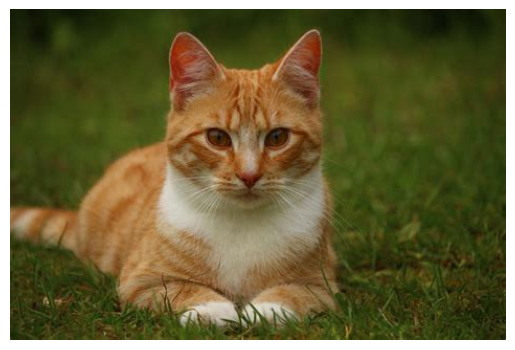

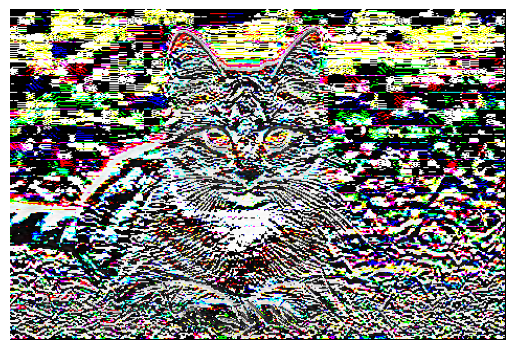

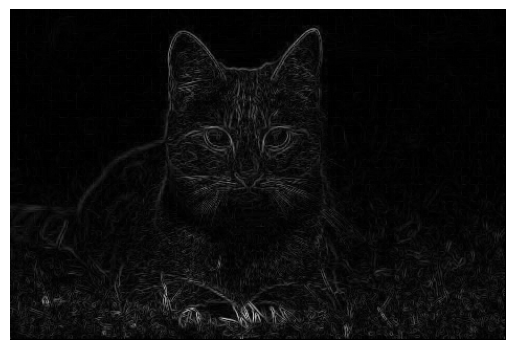

In [25]:
rob_cross_pixel_matrix_grey = roberts_cross(grey_pixel_matrix)

show_image(pixel_matrix)

show_image(rob_cross_pixel_matrix)

show_image(rob_cross_pixel_matrix_grey)